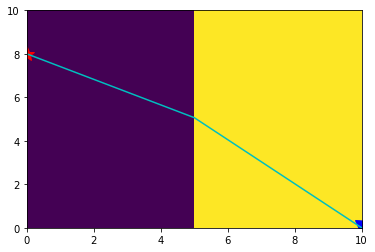

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math
from ipywidgets import interact
import ipywidgets as widgets


source = {'x': 0, 'y': 8}
receiver = {'x': 10, 'y': 0}

x0 = 0
y0 = 0
dx = 5
dy = 10
xgrid = np.arange(x0, 11, dx)
ygrid = np.arange(y0, 11, dx)
nx = len(xgrid) - 1
ny = len(ygrid) - 1

mesh_x, mesh_y = np.meshgrid(xgrid, ygrid)

velocity = np.array([1000, 2000])
velocityplot = np.tile(velocity, (2, 1))
#velocityplot = np.hstack((velocityplot, velocityplot[:, -1:]))

# Rat tracing shooting
sudut_datang = np.arange(-45, 91, 0.1)
bataslapisan_x = 5

error_min = float('inf')
raypath = {'x': [], 'y': []}


for i in range(len(sudut_datang)):
    dyy = np.tan(np.deg2rad(sudut_datang[i])) * dx
    if source['y'] > receiver['y']:
        bataslapisan_y = source['y'] - dyy
    else:
        bataslapisan_x = source['y'] + dyy

    sudut_transmisi = np.sin(np.deg2rad(sudut_datang[i])) * velocity[1] / velocity[0]
    dyy = np.tan(sudut_transmisi) * dx

    if source['y'] > receiver['y']:
        receiver_temp_y = source['y'] - dyy
    else:
        receiver_temp_y = source['y'] + dyy
    error_dist = np.sqrt((receiver['x'] - receiver['x'])**2 + (receiver_temp_y - receiver['y'])**2)

    if error_dist < error_min:
        error_min = error_dist
        raypath['x'] = [source['x'], bataslapisan_x, receiver['x']]
        raypath['y'] = [source['y'], bataslapisan_y, receiver_temp_y]

# Time calculation
time_calculation = 0
for i in range(len(raypath['x']) - 1):
    time_calculation += np.sqrt((raypath['x'][i] - raypath['x'][i+1])**2 + (raypath['y'][i] - raypath['y'][i+1])**2) / velocity[i]

# Visualisasi
plt.pcolor(mesh_x, mesh_y, velocityplot)
plt.plot(source['x'], source['y'], '*r', markersize=15)
plt.plot(receiver['x'], receiver['y'], 'vb', markersize=15)
plt.plot(raypath['x'], raypath['y'], 'c')

#plt.xlim(-5,15)
#plt.ylim(-5,15)
plt.show()

In [2]:
time_calculation

0.009355318666201339